In [32]:
!pip install datasets

     |████████████████████████████████| 480 kB 646 kB/s eta 0:00:01
     |████████████████████████████████| 132 kB 757 kB/s eta 0:00:01
     |████████████████████████████████| 194 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 621 kB/s eta 0:00:01     |██████████████                  | 542 kB 258 kB/s eta 0:00:03     |███████████████                 | 583 kB 258 kB/s eta 0:00:03
     |████████████████████████████████| 179 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 484 kB 1.2 MB/s eta 0:00:01    |██████                          | 92 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 40.0 MB 373 kB/s eta 0:00:01    |▏                               | 225 kB 840 kB/s eta 0:00:48     |██████▍                         | 8.0 MB 859 kB/s eta 0:00:38     |██████▌                         | 8.1 MB 859 kB/s eta 0:00:38     |███████                         | 8.9 MB 2.6 MB/s eta 0:00:12     |███████████▊                    | 14.6 MB 273 kB/s e

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

/home/student/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
california = fetch_california_housing()

In [3]:
pd.set_option('display.precision',4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

In [4]:
df = pd.DataFrame(california.data, columns=california.feature_names)

In [5]:
df['MedHouseValue'] = pd.Series(california.target)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [8]:
sample = df.sample(frac=0.1, random_state=37)
sample.shape

(2064, 9)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_style('whitegrid')
sns.set(font_scale=2)

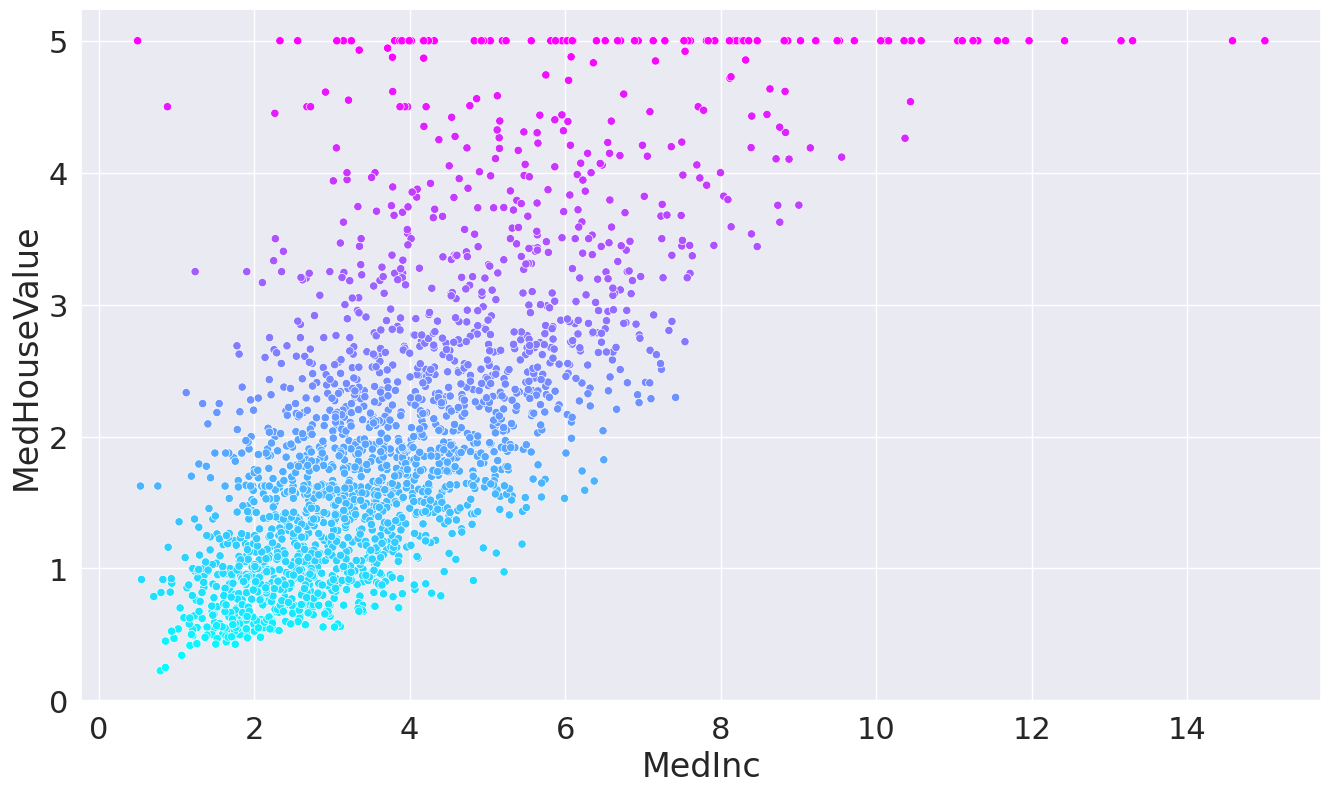

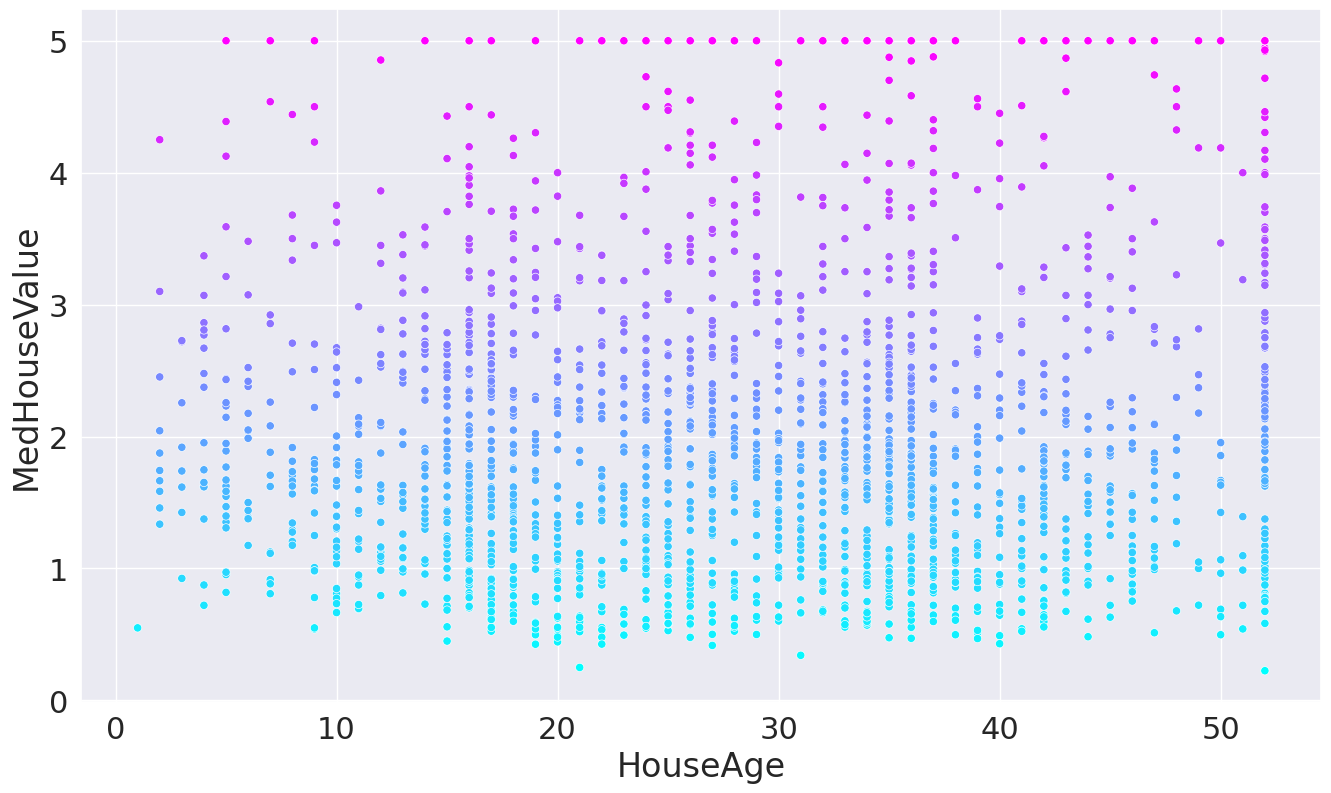

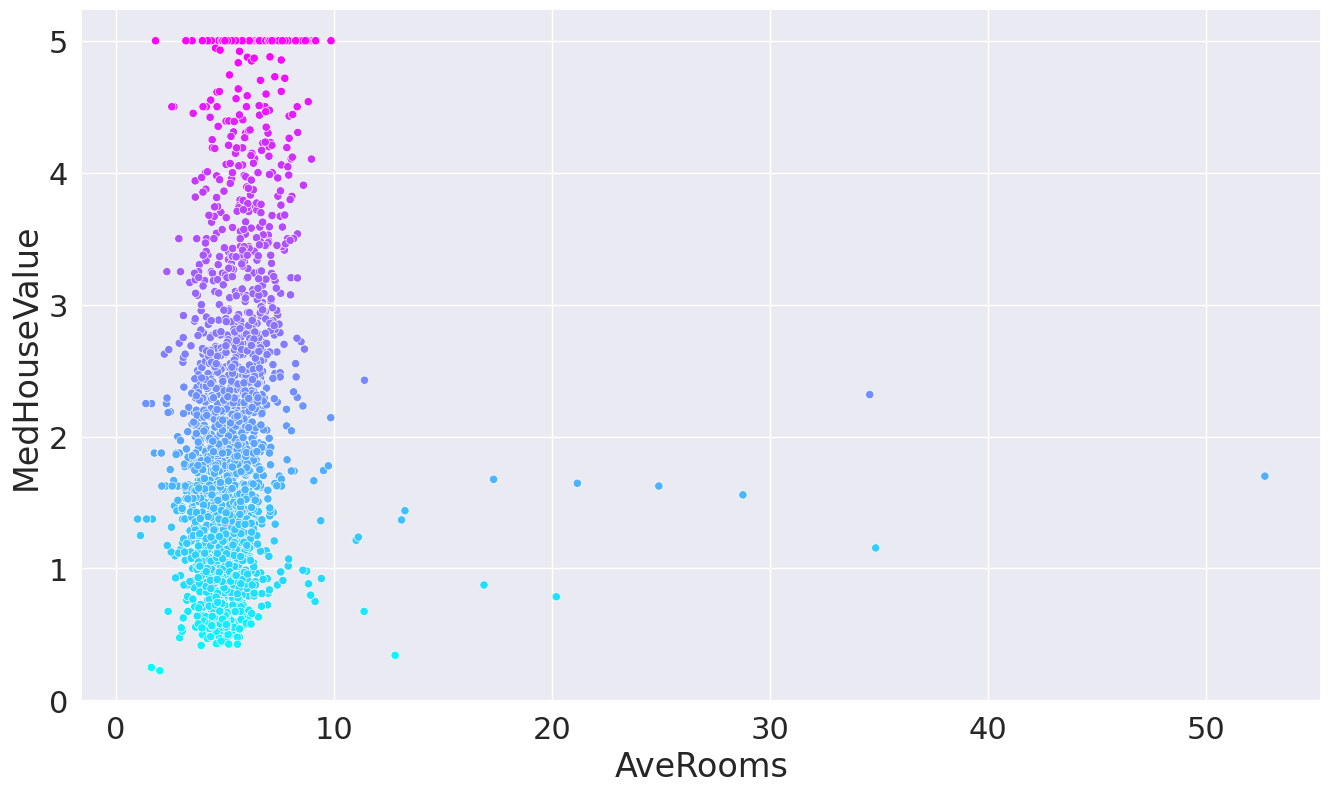

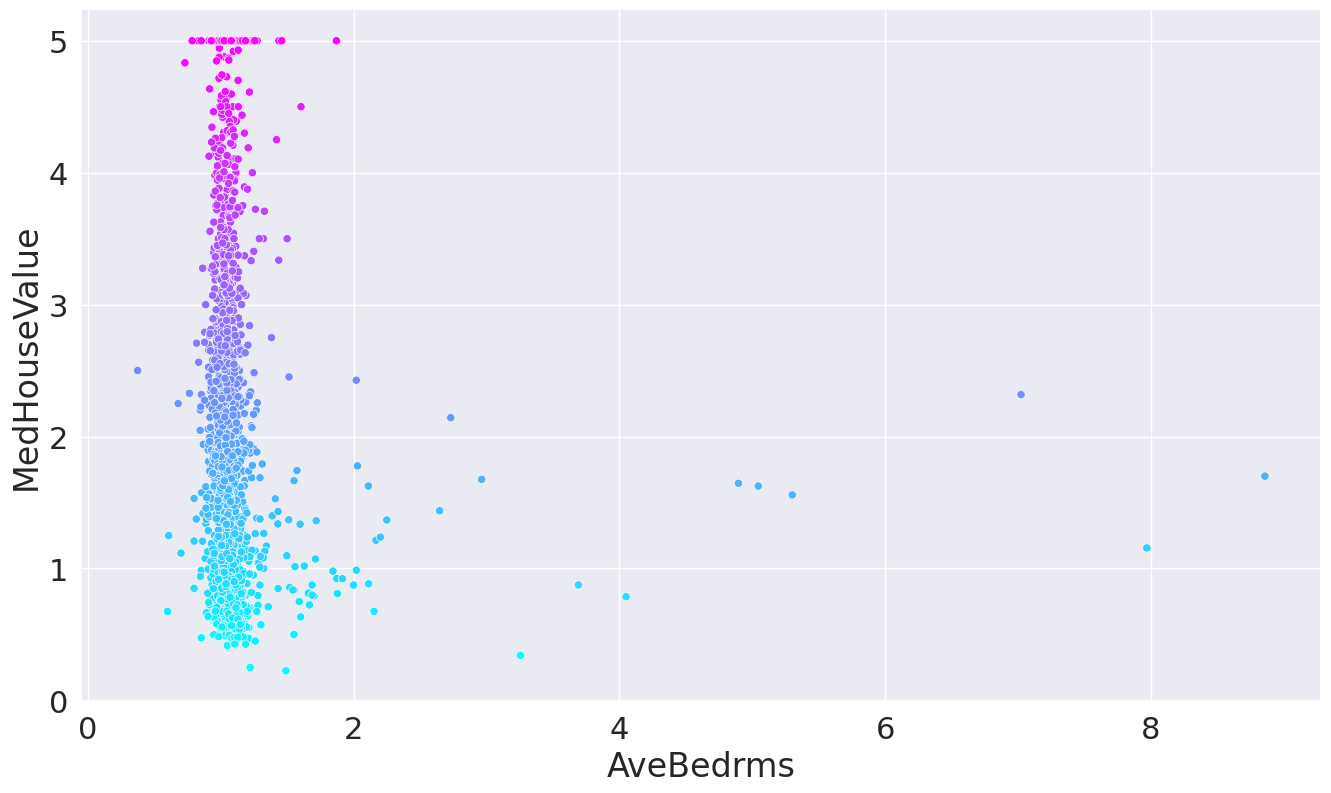

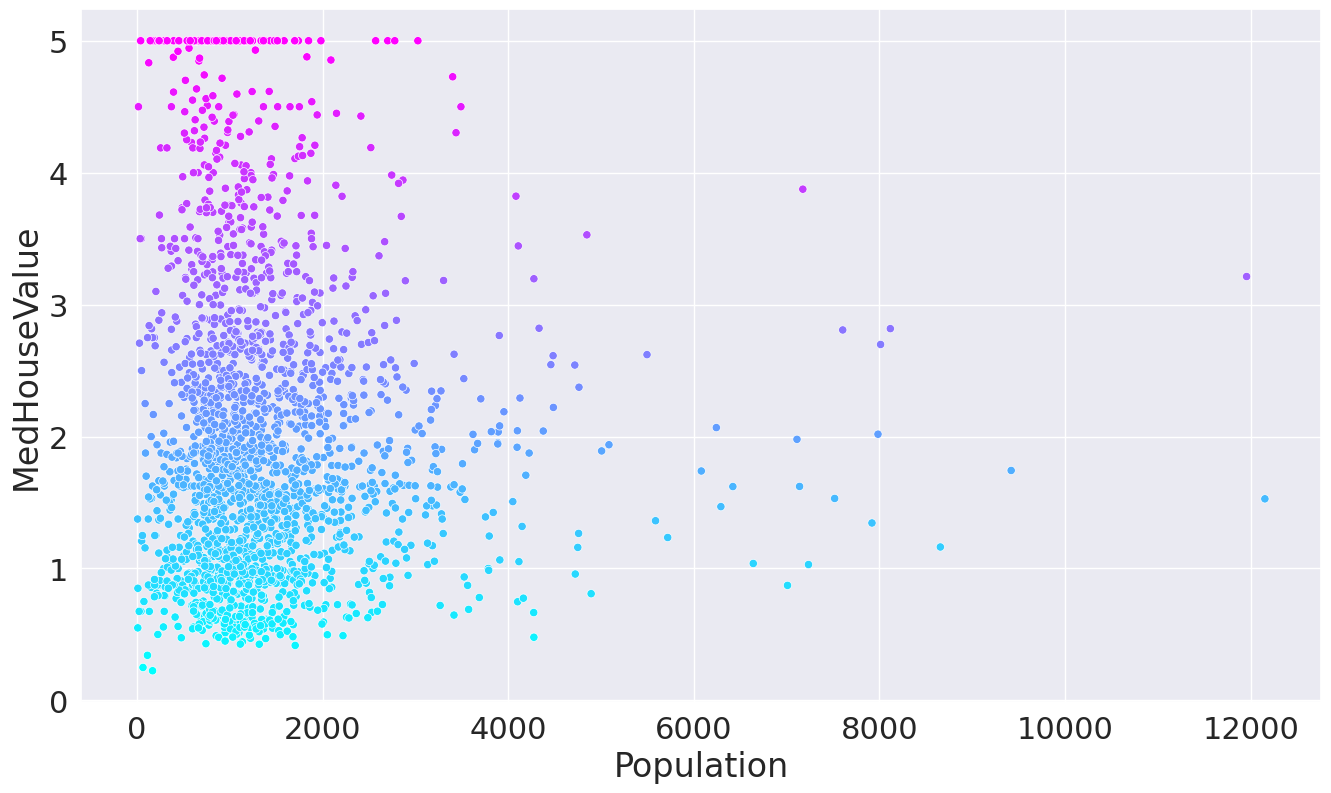

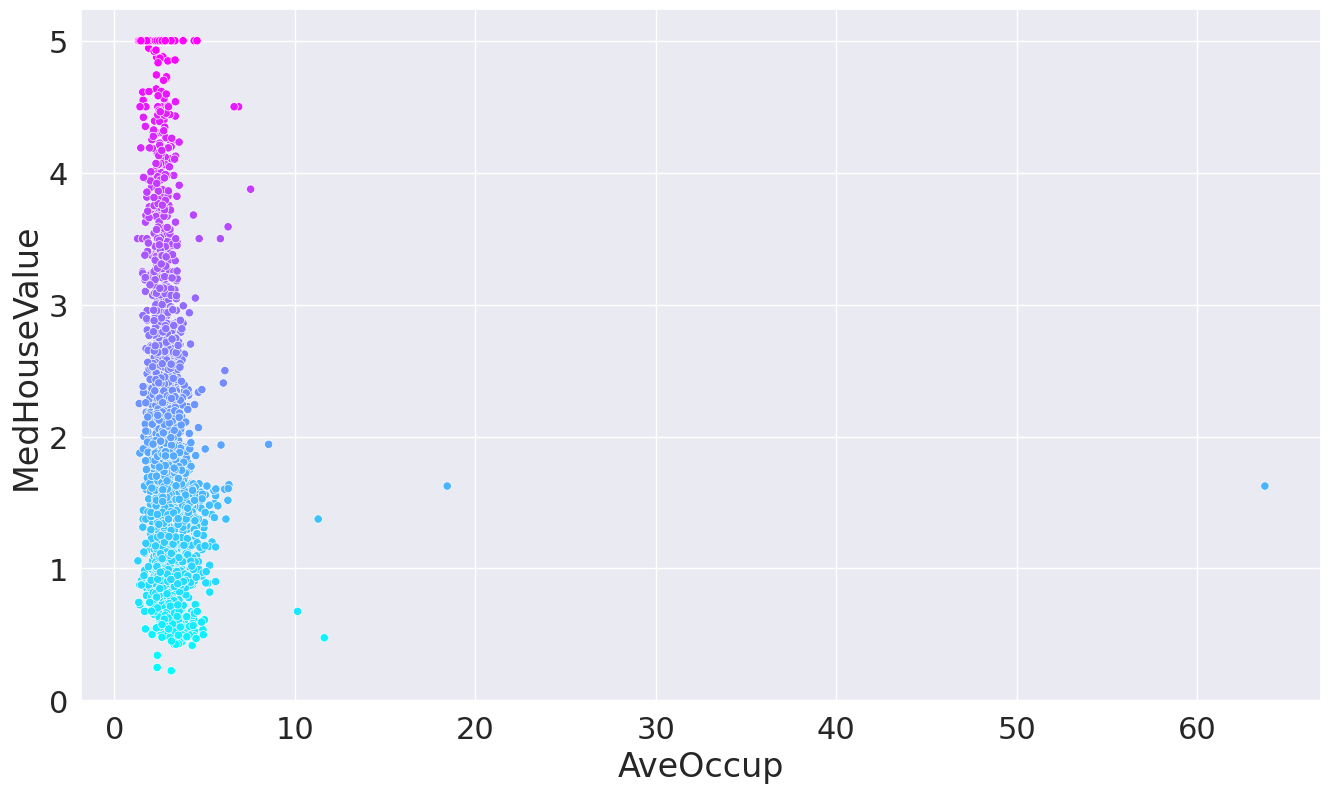

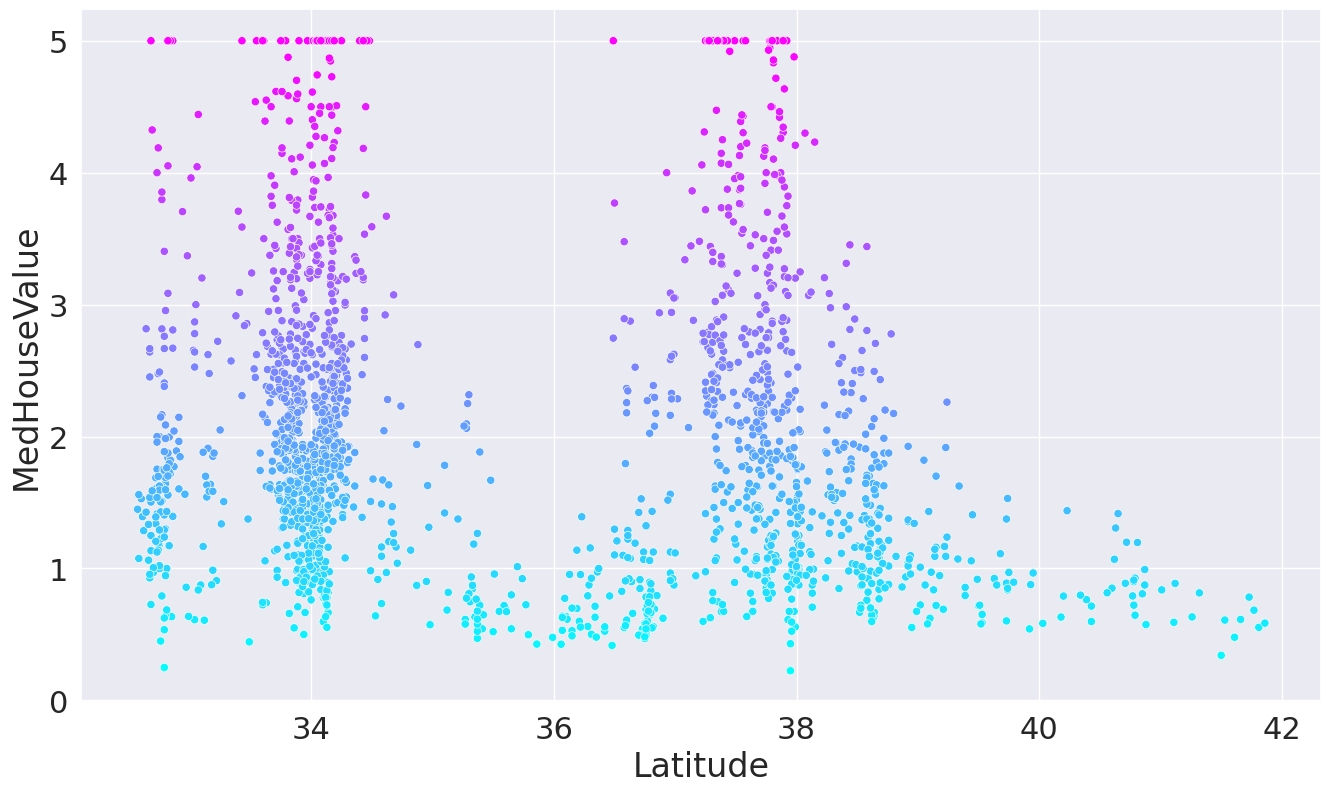

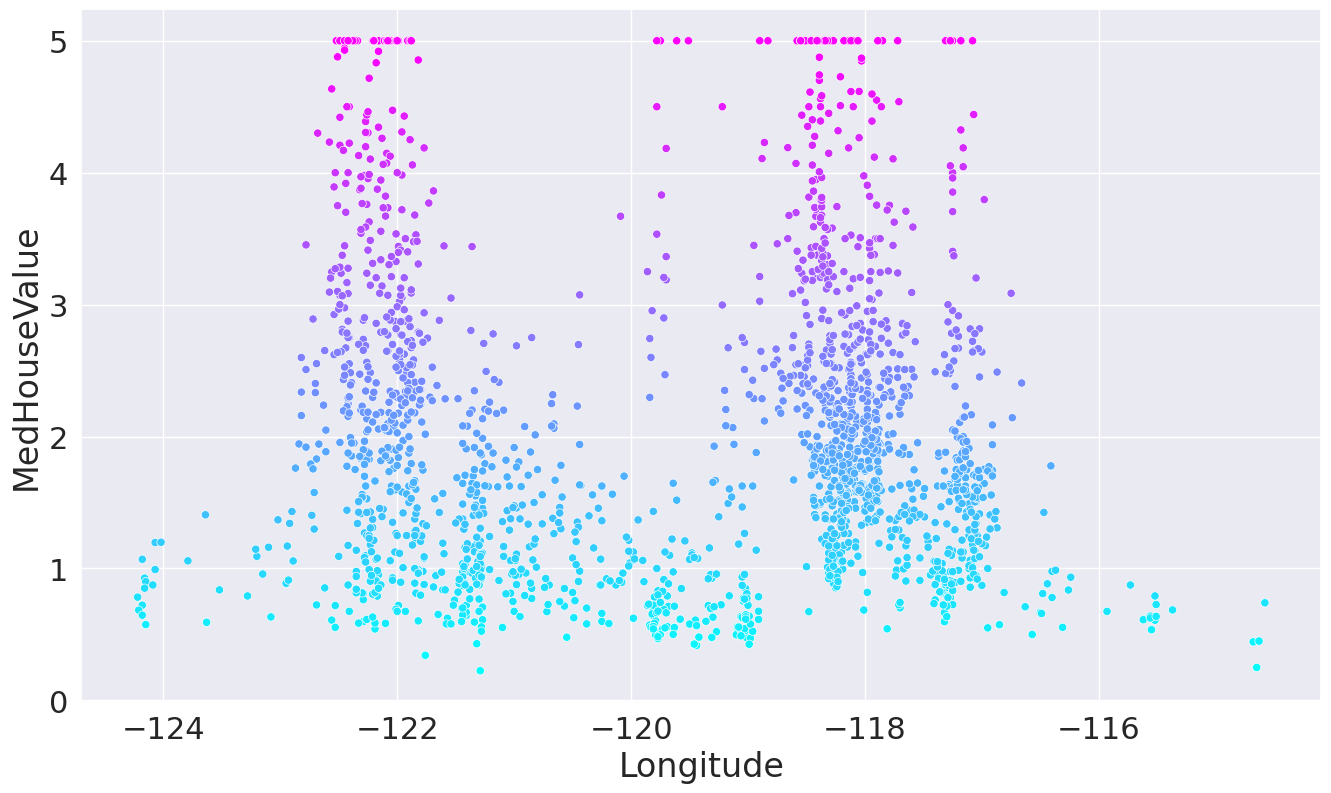

In [11]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample, x=feature, y ='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=37
                                                    )

In [13]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
model = LinearRegression(copy_X=True, fit_intercept=True, )
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_predict = model.predict(X_test)

In [17]:
df = pd.DataFrame({'Expected': Y_test, 'Predicted': Y_predict})
df.head()

,Expected,Predicted
0,0.982,1.3315
1,0.840,1.6455
2,0.838,0.5042
3,3.793,3.4652
4,1.625,1.0622


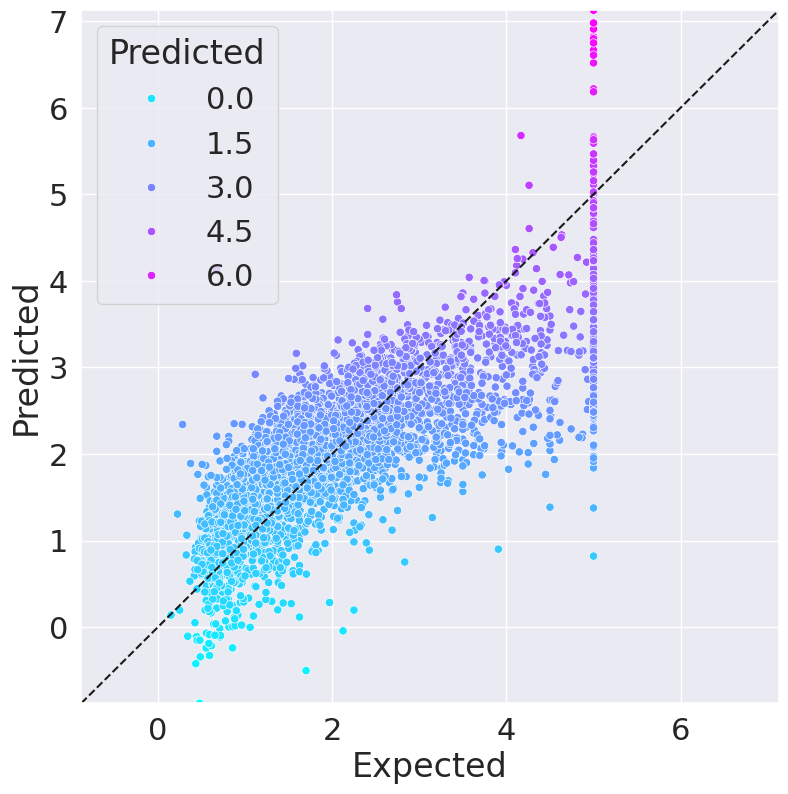

In [18]:
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y ='Predicted', hue='Predicted', palette='cool')

start = min(df.Expected.min(), df.Predicted.min())
end = max(df.Expected.max(), df.Predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end],[start, end], 'k--')

In [19]:
print("R2 Score: ", metrics.r2_score(df.Expected, df.Predicted))
print("MSE: ", metrics.mean_absolute_error(df.Expected, df.Predicted))

R2 Score:  0.6207375035130314
MSE:  0.5224542719314189


In [20]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    "LinearRegression": model,
    "ElasticNet": ElasticNet(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
}

In [21]:
from sklearn.model_selection import KFold, cross_val_score

for name, obj in estimators.items():
    kfold = KFold(n_splits=10, random_state=37, shuffle=True)
    scores = cross_val_score(estimator=obj, X = california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{name:>16}: ' +f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.603
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.603


In [22]:
import matplotlib.pyplot as plt

In [ ]:
from datasets

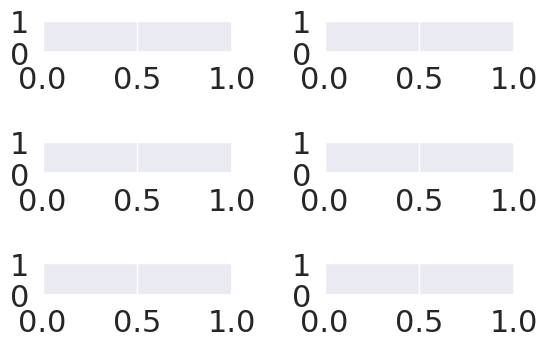

In [29]:
figures, axes = plt.subplots(nrows=3, ncols=2, figsize=(6,4))
plt.tight_layout()

In [31]:
for item in zip(axes.ravel(), )

(3, 2)